# Functions of Arrays

`numpy` provides a wide range of functions for performing mathematical operations on arrays. We've already seen a few of these, such a addition, multiplication, exponentiation, and trig functions. In this lecture, we'll go into a bit more detail on entrywise functions. We'll also discuss aggregation functions that allow us to summarize large sets of numbers. 

In [1]:
import numpy as np

In [3]:
A = np.arange(1, 11)
B = np.arange(11, 21)
A, B

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20]))

In [4]:
# Negate an array
print(-A)

A = -np.arange(1,11)
print(A)

A = np.arange(-1,-11) # [] empty, cuz can not have negative index in numpy
print(A)

[ -1  -2  -3  -4  -5  -6  -7  -8  -9 -10]
[ -1  -2  -3  -4  -5  -6  -7  -8  -9 -10]
[]


In [5]:
# absolute value: 
A = np.arange(1, 11)
np.abs(-A)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
# entrywise binary arithmetic operators
# all of these also work with a single scalar (e.g. replace B with 2)

print(A + B)
print(A + 2)
print(A - B)

print()

print(A * B)

print()

print(A / B)

print()

print(B ** A)

print()

print(B % A)

[12 14 16 18 20 22 24 26 28 30]
[ 3  4  5  6  7  8  9 10 11 12]
[-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]

[ 11  24  39  56  75  96 119 144 171 200]

[0.09090909 0.16666667 0.23076923 0.28571429 0.33333333 0.375
 0.41176471 0.44444444 0.47368421 0.5       ]

[            11            144           2197          38416
         759375       16777216      410338673    11019960576
   322687697779 10240000000000]

[0 0 1 2 0 4 3 2 1 0]


## Mathematical Functions

#### Trig Functions

In [13]:
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [12]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))
# ---

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


#### Exponentials and Logarithms

In [14]:
x = np.array([1, 2, 3])

In [15]:
# exponentiate a scalar
2**x

array([2, 4, 8])

In [16]:
# exponential function e^x
np.exp(x)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [22]:
# natural logarithm (ln(x)) hashtag best logarithm
np.log(x) # ln(x)

array([0.        , 0.69314718, 1.09861229])

In [23]:
# base 10 and base 2 logarithms
# 

print(np.log2(x))
print(np.log10(x))

[0.        1.        1.5849625]
[0.         0.30103    0.47712125]


#### NaN

When `numpy` performs an illegal mathematical operation, it will generate the value `np.nan` (for Not A Number). A common example is computing the logarithm of negative numbers. **Warnings** are generated in this case. 

In [24]:
x = np.array([-1, -2])
x, np.log(x)

/var/folders/jt/m55yxv8d0wxgwy79rkghhwsc0000gn/T/ipykernel_52025/1140562689.py:2: RuntimeWarning: invalid value encountered in log
  x, np.log(x)


(array([-1, -2]), array([nan, nan]))

NaN values propagate: any operation involving an NaN will generate more NaNs in the corresponding entries: 

In [25]:
y = np.log(x)
y, y + 2

/var/folders/jt/m55yxv8d0wxgwy79rkghhwsc0000gn/T/ipykernel_52025/2101076884.py:1: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


(array([nan, nan]), array([nan, nan]))

A similar case occurs when we try to divide by zero. In this case, we get `np.inf` (for infinity): 

In [26]:
z = np.array([1, 1]) / np.array([0, 0])
z

/var/folders/jt/m55yxv8d0wxgwy79rkghhwsc0000gn/T/ipykernel_52025/111946823.py:1: RuntimeWarning: divide by zero encountered in divide
  z = np.array([1, 1]) / np.array([0, 0])


array([inf, inf])

`np.inf` values also propagate, e.g. `1 + np.inf = np.inf`. However, we can divide by `np.inf` values: 

In [27]:
1/z

array([0., 0.])

## Plotting Functions

We haven't yet formally introduced data visualization tools in Python. As a quick preview, let's see how to use vectorized `numpy` to easily plot mathematical functions. 

In [28]:
from matplotlib import pyplot as plt

#### Parabola

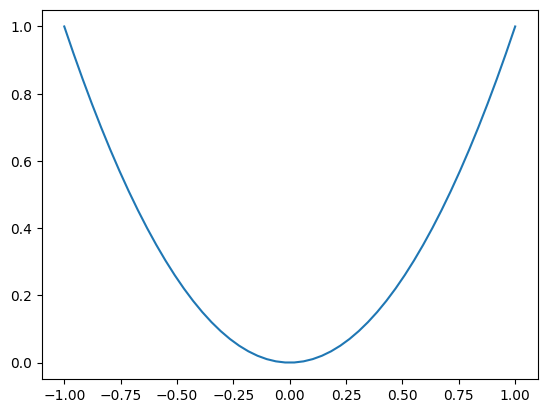

In [33]:
x = np.linspace(-1, 1, 100)
plt.plot(x, x**2) # y = x^2, with a range of [-1,1]

#### Exponential and Logarithm

/var/folders/jt/m55yxv8d0wxgwy79rkghhwsc0000gn/T/ipykernel_52025/332454423.py:2: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(x), label = r"$y = \log(x)$")


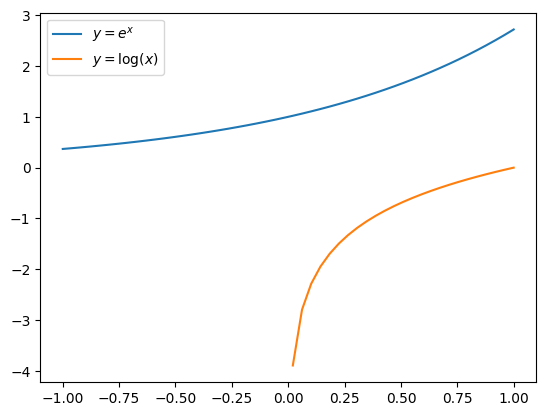

In [34]:
plt.plot(x, np.exp(x), label = r"$y = e^x$")
plt.plot(x, np.log(x), label = r"$y = \log(x)$")
plt.legend()
# warning comes from trying to compute np.log(-1)

#### 2-d Plotting

It's easy to compute functions over multi-dimensional arrays. An especially common case is when we want to compute a function over one or more 2d arrays and then plot the result. Here's a simple example. We'll go into more detail on how to obtain finer control when we go more deeply into plotting in a future lecture. 

In [52]:
# two 100x100 arrays
x = np.reshape(np.linspace(0, 2*np.pi, 10000), (100, 100))
y = np.reshape(np.linspace(0, 2*np.pi, 10000), (100, 100)).T

# function of these arrays, also 100x100
z = np.sin(x) + np.cos(y)
z

array([[1.        , 0.99865472, 0.99336989, ..., 1.04331654, 1.05373415,
        1.06023523],
       [1.06279659, 1.0614106 , 1.05608519, ..., 1.10599366, 1.11636862,
        1.12282672],
       [1.12534491, 1.12391573, 1.11854727, ..., 1.168183  , 1.17851284,
        1.18492549],
       ...,
       [0.8113604 , 0.80618247, 0.79708749, ..., 0.86536236, 0.87197752,
        0.87465351],
       [0.87338221, 0.86817112, 0.85904326, ..., 0.92798314, 0.93456276,
        0.93720301],
       [0.93589596, 0.93064924, 0.92148603, ..., 0.99085636, 0.99739795,
        1.        ]])

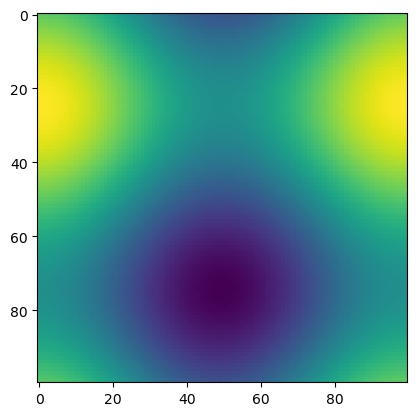

In [27]:
plt.imshow(z)